In [177]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

plt.figure(figsize=(8,8))

In [178]:
# import images and resize into 250x250
import glob
img_rows, img_cols = 224, 224
import cv2
N = 150
data = np.empty((N, img_rows, img_cols), dtype=np.uint8)#../hackathon/*
img_names = []
for ix, filename in enumerate(glob.glob("../hackathon/car_parking_dataset/*.jpg")): #/Users/Stav/Downloads/cars_markus_old/*.jpg")): #assuming gif
    try:
        img_names.append(filename)
        img = cv2.imread(filename,flags = 1)
        
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # opencv reads images in bgr lets convert back
    
        img = cv2.resize(img, (img_rows,img_cols))
        #print (img.shape)
        data[ix, ...] = img#.transpose(2, 0, 1)
    except:
        continue

In [179]:
data[1].shape

(224, 224)

In [191]:
img_gray = data[0]

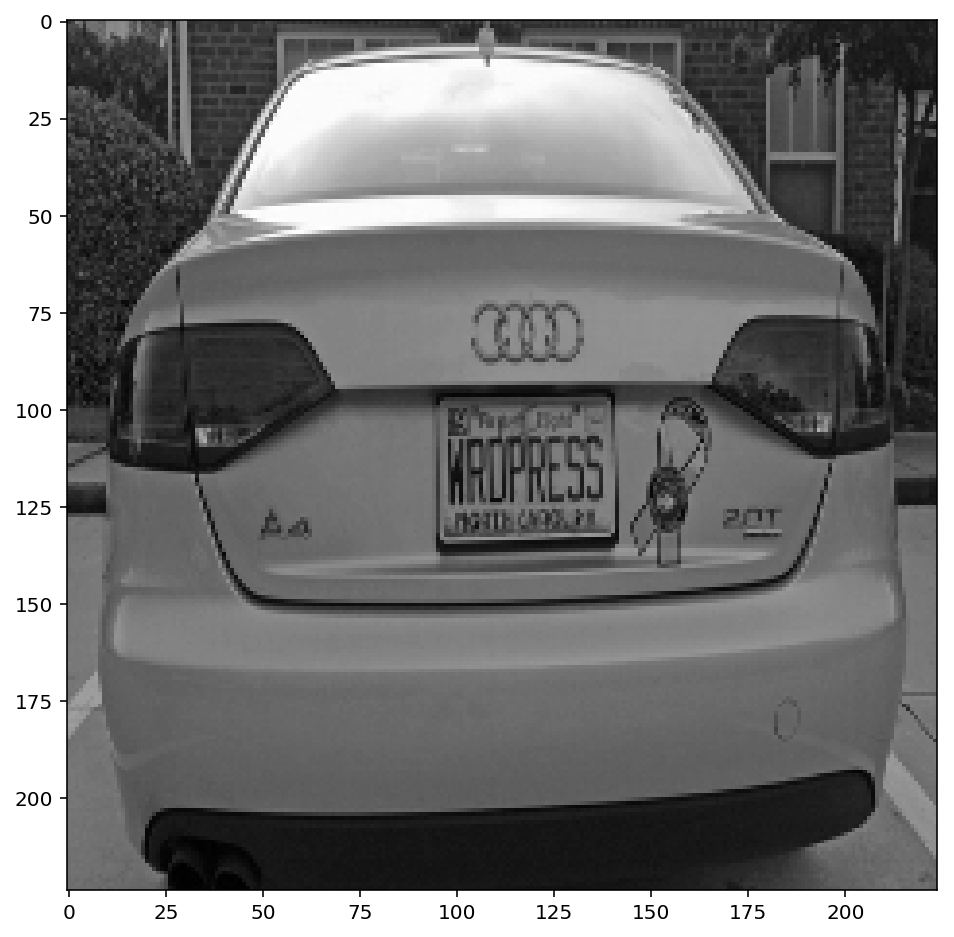

In [192]:

# RGB to Gray scale conversion
plt.figure(figsize = (8,8))

# Creating a Named window to display image
plt.imshow(img_gray, cmap="gray")
# Display Image

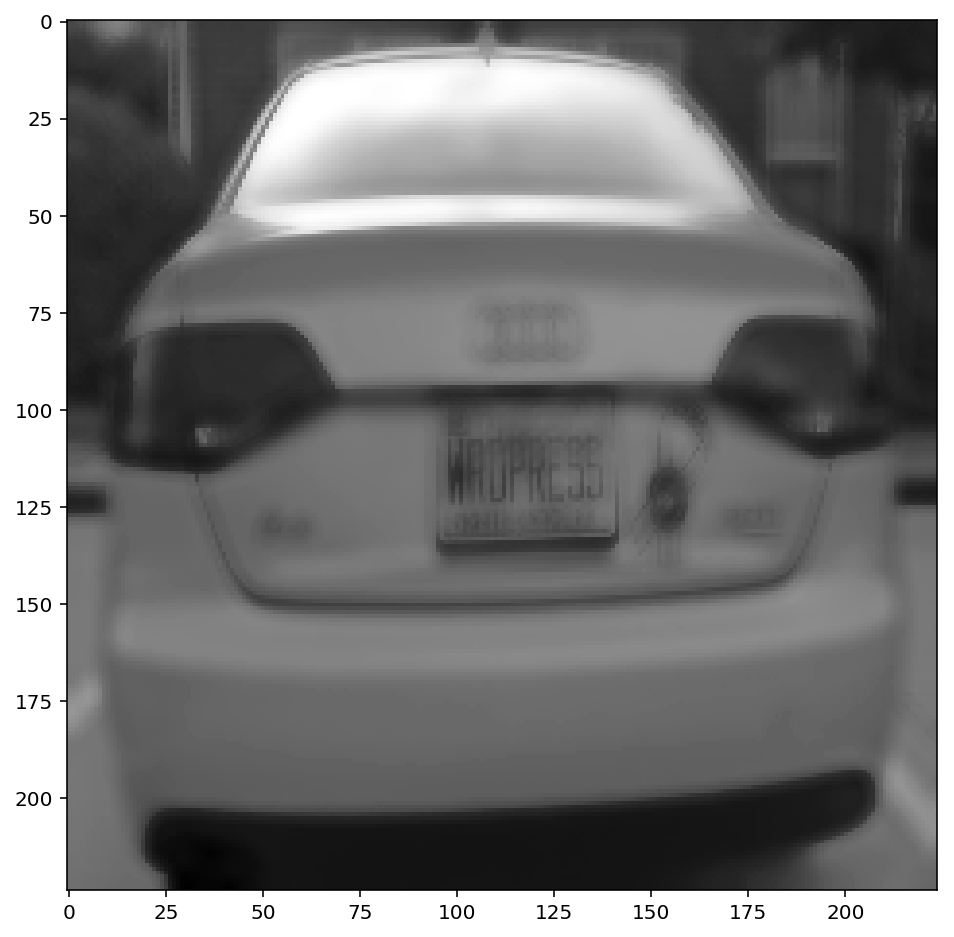

In [193]:
plt.figure(figsize = (8,8))
# Noise removal with iterative bilateral filter(removes noise while preserving edges)
noise_removal = cv2.bilateralFilter(img_gray,9,75,75)
# Creating a Named window to display image
plt.imshow(noise_removal, cmap = "gray")
# Display Image

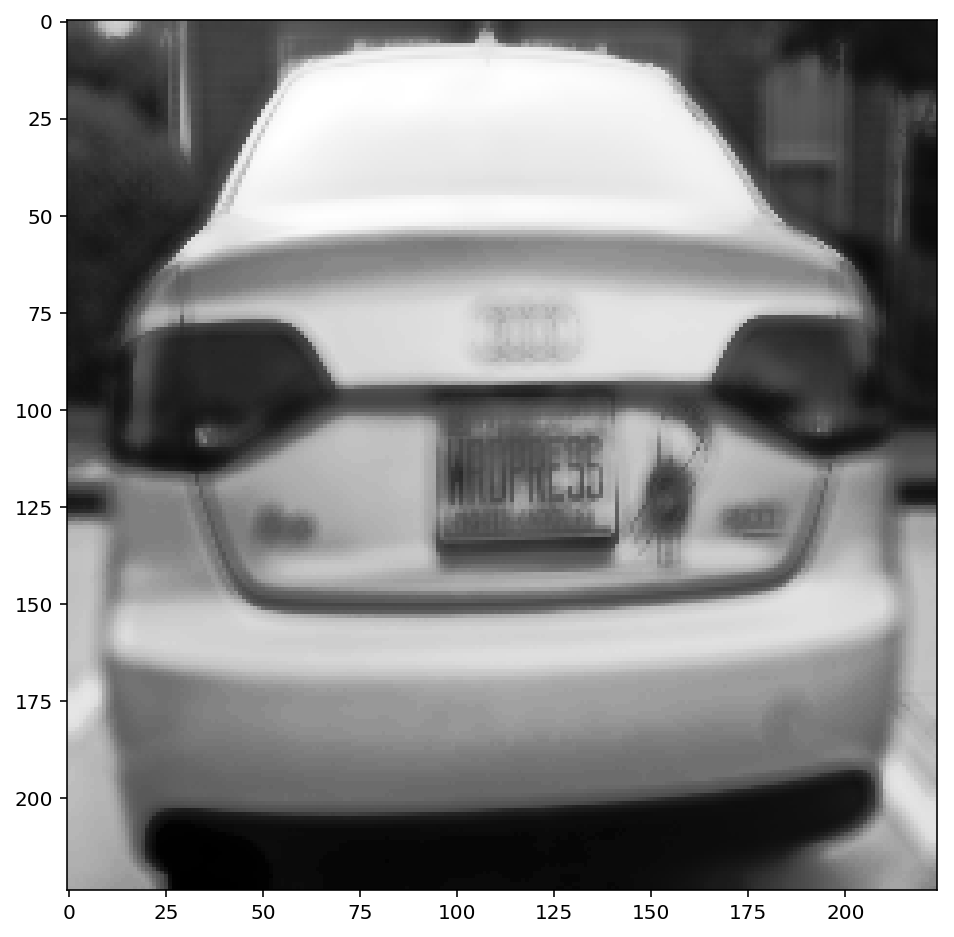

In [194]:
plt.figure(figsize = (8,8))

# Histogram equalisation for better results
equal_histogram = cv2.equalizeHist(noise_removal)
# Creating a Named window to display image
plt.imshow(equal_histogram, cmap = "gray")
# Display Image

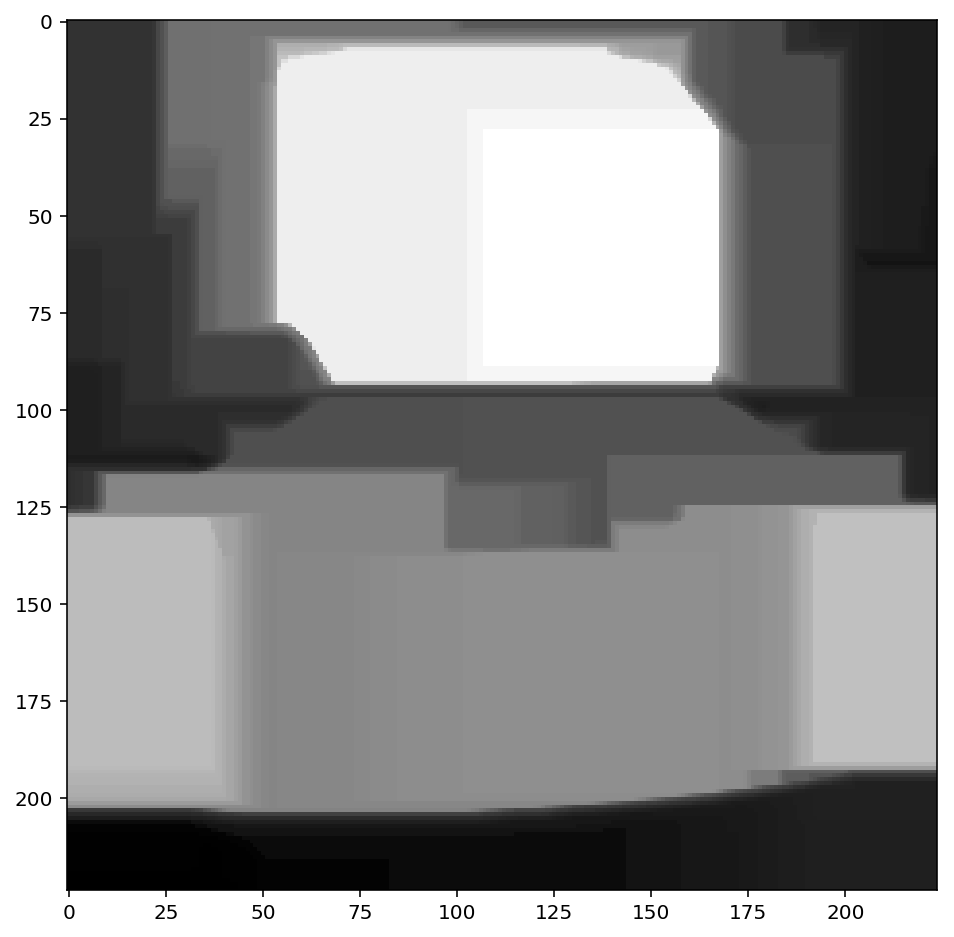

In [195]:
plt.figure(figsize = (8,8))

# Morphological opening with a rectangular structure element
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))
morph_image = cv2.morphologyEx(equal_histogram,cv2.MORPH_OPEN,kernel,iterations=15)
# Creating a Named window to display image
plt.imshow(morph_image, cmap = "gray")
# Display Image

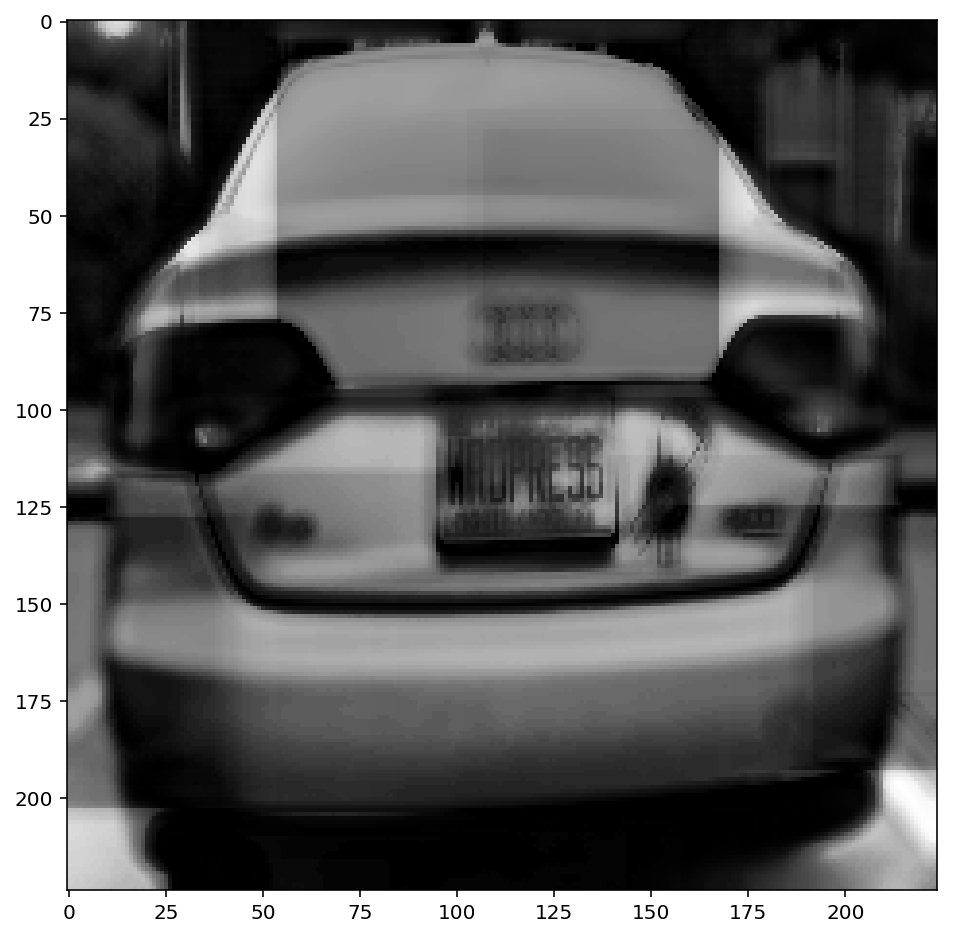

In [196]:
plt.figure(figsize = (8,8))

# Image subtraction(Subtracting the Morphed image from the histogram equalised Image)
sub_morp_image = cv2.subtract(equal_histogram,morph_image)
# Creating a Named window to display image
plt.imshow(sub_morp_image, cmap = "gray")
# Display Image

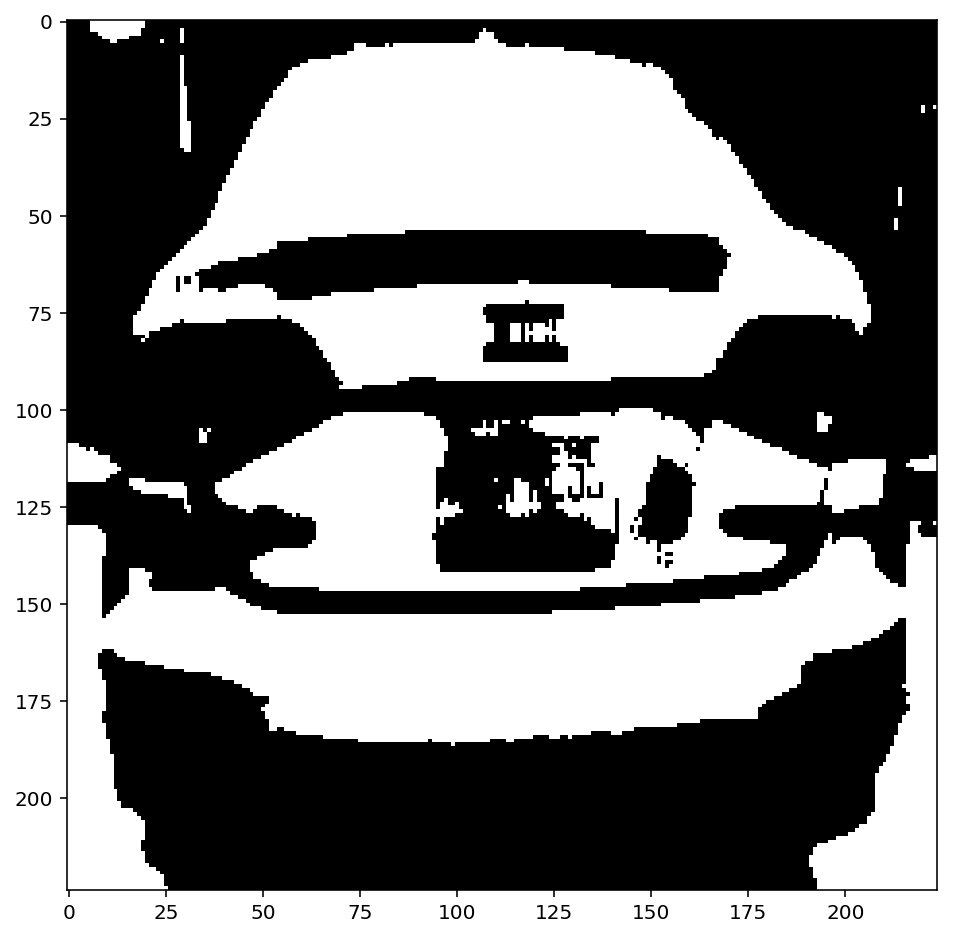

In [197]:
plt.figure(figsize = (8,8))

# Thresholding the image
ret,thresh_image = cv2.threshold(sub_morp_image,0,255,cv2.THRESH_OTSU)
# Creating a Named window to display image
plt.imshow(thresh_image, cmap="gray")
# Display Image

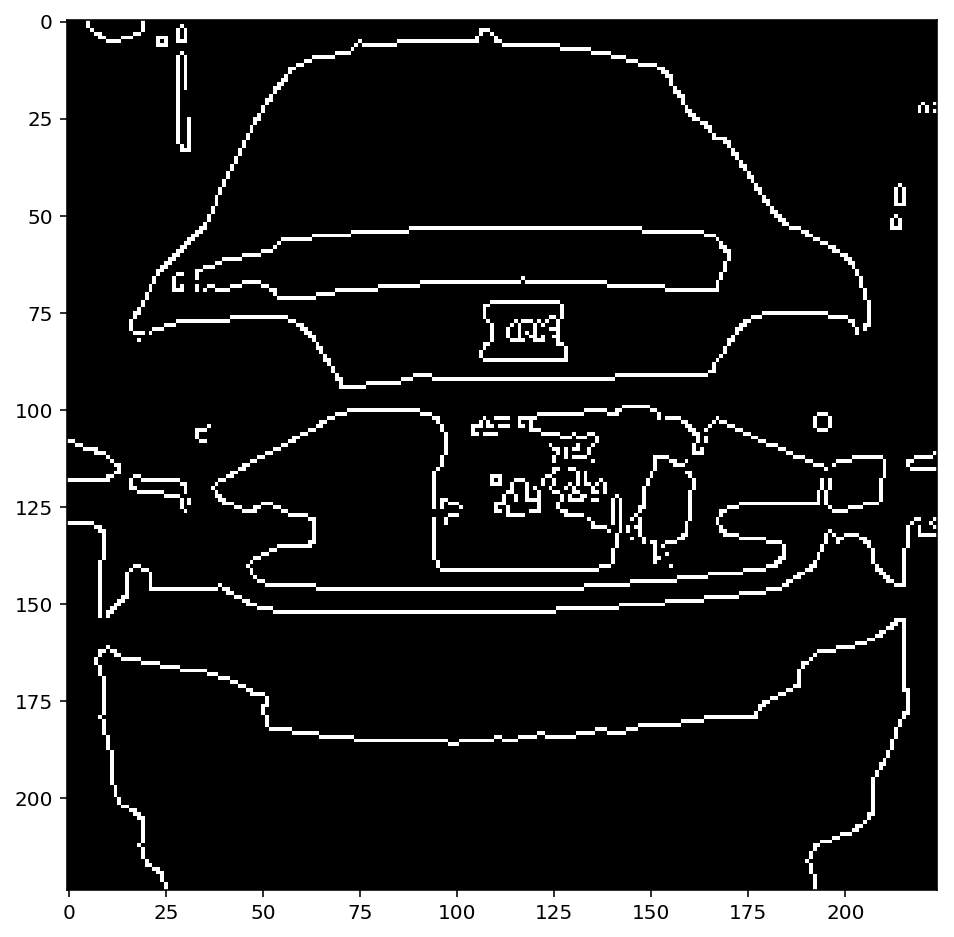

In [198]:
# Applying Canny Edge detection
plt.figure(figsize = (8,8))

canny_image = cv2.Canny(thresh_image,250,255)
# Creating a Named window to display image
plt.imshow(canny_image, cmap = "gray")
# Display Image
canny_image = cv2.convertScaleAbs(canny_image)

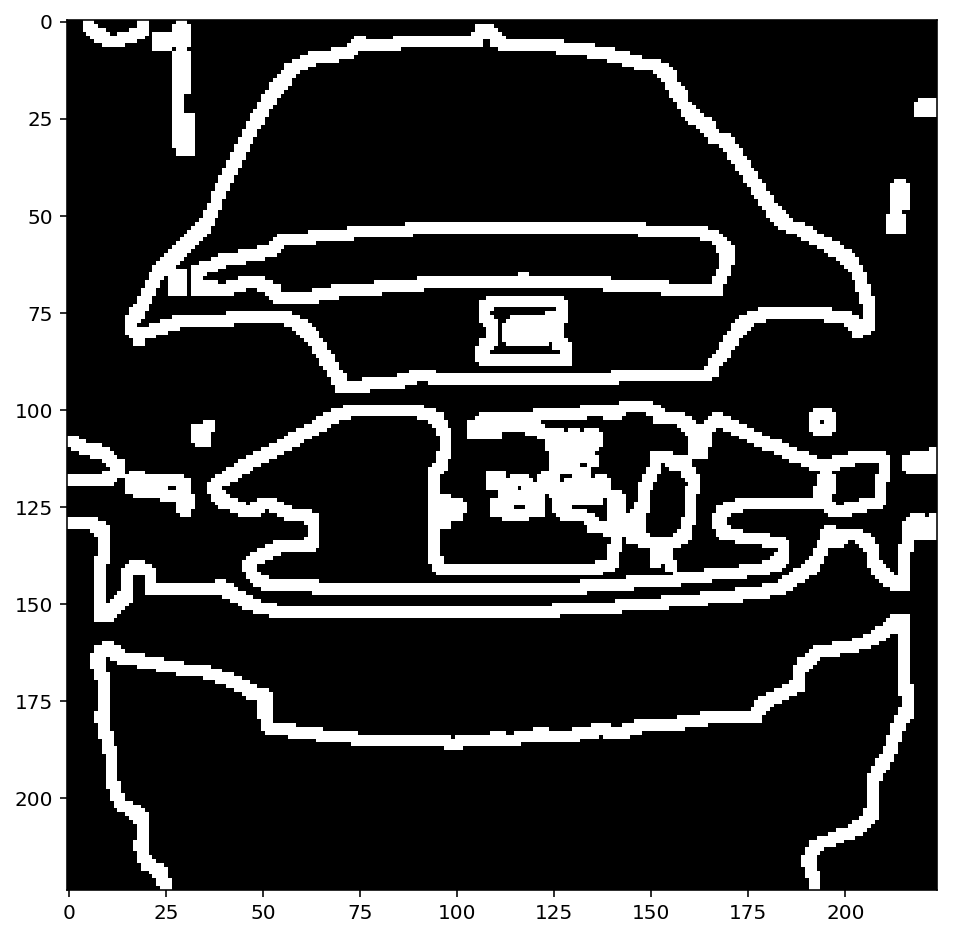

In [199]:
plt.figure(figsize = (8,8))

# dilation to strengthen the edges
kernel = np.ones((3,3), np.uint8)
# Creating the kernel for dilation
dilated_image = cv2.dilate(canny_image,kernel,iterations=1)
# Creating a Named window to display image
plt.imshow(dilated_image, cmap = "gray")
# Displaying Image


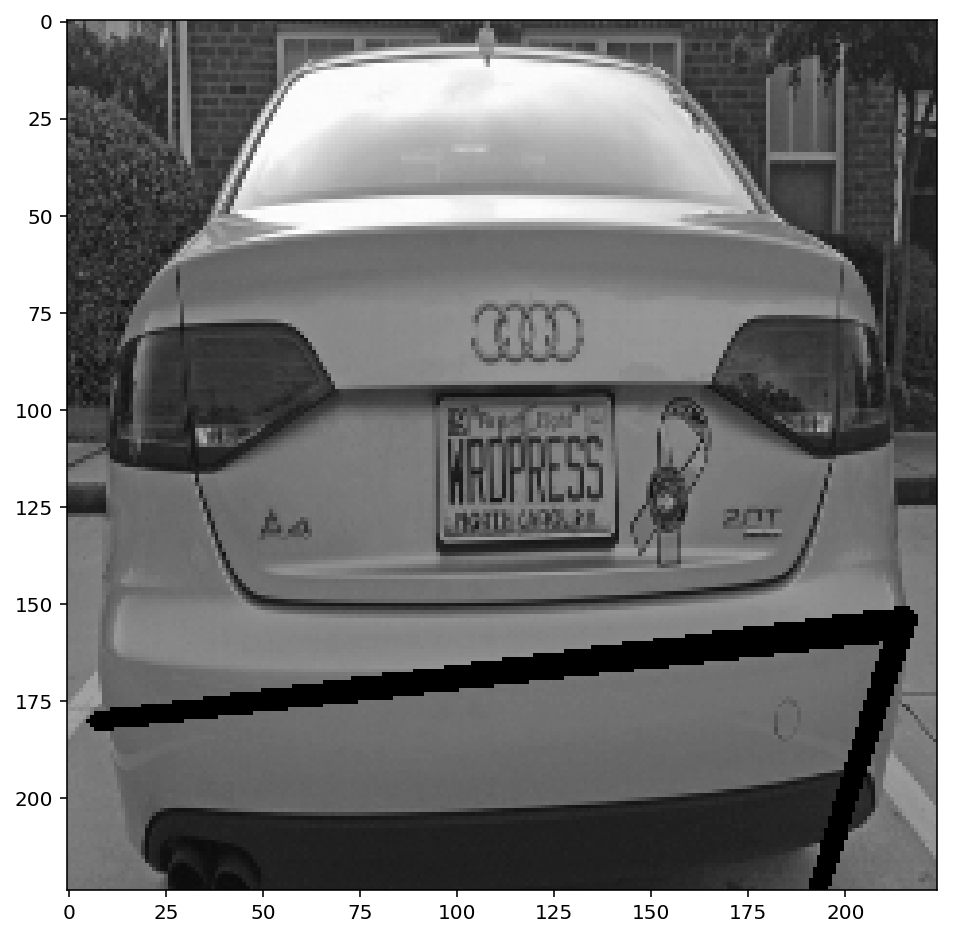

In [200]:
plt.figure(figsize = (8,8))
new,contours, hierarchy = cv2.findContours(dilated_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours= sorted(contours, key = cv2.contourArea, reverse = True)[:10]
# Sort the contours based on area ,so that the number plate will be in top 10 contours
screenCnt = None
# loop over our contours
for c in contours:
 # approximate the contour
 peri = cv2.arcLength(c, True)
 approx = cv2.approxPolyDP(c, 0.06 * peri, True)  # Approximating with 6% error
 # if our approximated contour has four points, then
 # we can assume that we have found our screen
 if len(approx) == 4:  # Select the contour with 4 corners
  screenCnt = approx
  break
final = cv2.drawContours(img_gray, [screenCnt], -1, (0, 255, 0), 3)
# Drawing the selected contour on the original image
#cv2.namedWindow("Image with Selected Contour",cv2.WINDOW_NORMAL)
# Creating a Named window to display image
plt.imshow(final, cmap = "gray")

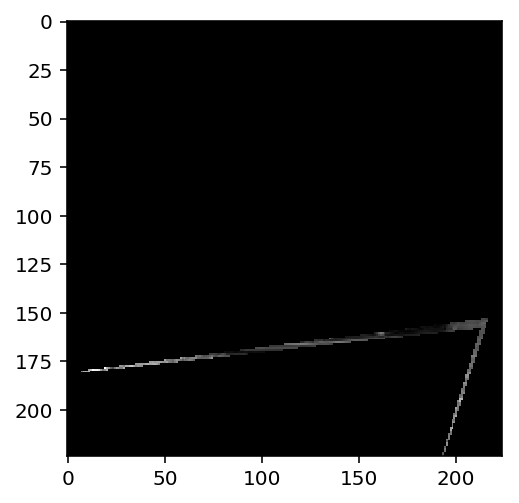

In [201]:

# Masking the part other than the number plate
mask = np.zeros(img_gray.shape,np.uint8)
new_image = cv2.drawContours(mask,[screenCnt],0,255,-1,)
new_image = cv2.bitwise_and(img,img,mask=mask)
plt.imshow(new_image, cmap = "gray")

In [126]:


# Histogram equal for enhancing the number plate for further processing
y,cr,cb = cv2.split(cv2.cvtColor(new_image,cv2.COLOR_RGB2YCrCb))
# Converting the image to YCrCb model and splitting the 3 channels
y = cv2.equalizeHist(y)
# Applying histogram equalisation
final_image = cv2.cvtColor(cv2.merge([y,cr,cb]),cv2.COLOR_YCrCb2RGB)
# Merging the 3 channels
# Creating a Named window to display image
plt.imshow(final_image)
# Display image



error: /Users/travis/build/skvark/opencv-python/opencv/modules/imgproc/src/color.cpp:11144: error: (-215) scn == 3 || scn == 4 in function cvtColor
